# Analisis Strategis Ulasan Produk Flipkart: Ekstraksi Insight Menggunakan IBM Granite LLM

Dataset: [Flipkart Product reviews with sentiment Dataset](https://www.kaggle.com/datasets/niraliivaghani/flipkart-product-customer-reviews-dataset/code)

## 1. Latar Belakang: Tambang Emas di Era Digital
Di tengah persaingan e-commerce yang ketat, ulasan pelanggan bukan lagi sekadar feedback, melainkan aset data strategis—sebuah tambang emas untuk memahami pasar. Namun, volume data yang masif dan tidak terstruktur sering kali membuat insight berharga di dalamnya terkubur dan tidak termanfaatkan.

Proyek ini berawal dari sebuah tantangan fundamental: bagaimana mengubah kebisingan (noise) dari ribuan ulasan menjadi sinyal (signal) yang jernih untuk pengambilan keputusan? Kami bertujuan menjembatani kesenjangan antara data mentah dan strategi bisnis yang cerdas.



##2. Rumusan Masalah: Dari Data ke Keputusan
Perusahaan seperti Flipkart mengumpulkan jutaan titik data dari ulasan, namun menghadapi kesulitan dalam menjawab pertanyaan-pertanyaan krusial secara efisien:

Apa pendorong utama kepuasan dan kekecewaan pelanggan secara spesifik?

Pola tersembunyi apa yang ada dalam keluhan mengenai produk tertentu (misalnya, masalah baterai pada elektronik, ukuran pada pakaian)?

Bagaimana cara memprioritaskan perbaikan produk atau layanan yang akan memberikan dampak terbesar bagi loyalitas pelanggan?

Proyek ini dirancang untuk menjawab pertanyaan-pertanyaan tersebut dengan memanfaatkan kekuatan Natural Language Processing (NLP) dan Large Language Models (LLM).

##3. Tujuan Proyek: Empat Pilar Menuju Insight

Proyek ini memiliki empat tujuan utama yang terukur:

Klasifikasi Sentimen Akurat: Mengklasifikasikan ulasan secara otomatis ke dalam tiga kategori—positif, negatif, dan netral—menggunakan IBM Granite LLM untuk memahami denyut nadi pelanggan secara keseluruhan.

Ekstraksi Tema Utama: Meringkas ribuan ulasan untuk mengidentifikasi tema keluhan dan pujian yang paling sering muncul (contoh: "kualitas pengiriman", "daya tahan baterai", "kesesuaian warna").

Identifikasi Faktor Kunci: Menganalisis hasil untuk menemukan faktor-faktor kunci yang paling signifikan memengaruhi rating dan sentimen pelanggan.

Rekomendasi Strategis: Merumuskan rekomendasi yang dapat ditindaklanjuti (actionable) untuk tim produk, pemasaran, dan layanan pelanggan berdasarkan temuan berbasis data.


##4. Metodologi dan Pendekatan Sistematis

•	Pemahaman Bisnis: Mendefinisikan tujuan dan metrik keberhasilan proyek dalam konteks bisnis Flipkart.

•	Akuisisi dan Persiapan Data: Menggunakan dataset dari Kaggle, dilanjutkan dengan pembersihan data (menangani nilai yang hilang, duplikat) dan pra-pemrosesan teks (tokenisasi, normalisasi).

•	Analisis Data Eksploratif (EDA): Memvisualisasikan distribusi sentimen, rating, dan mengidentifikasi kata kunci yang sering muncul untuk mendapatkan pemahaman awal.

•	Pemodelan dengan IBM Granite LLM:

•	Klasifikasi Sentimen: Menerapkan model untuk melabeli setiap ulasan dengan sentimen yang sesuai.

•	Ekstraksi dan Peringkasan Tema: Menggunakan kemampuan generatif model untuk mengelompokkan ulasan berdasarkan topik dan membuat ringkasan dari setiap kelompok tema.

•	Analisis dan Interpretasi Hasil: Menganalisis output model untuk menggali insight mendalam dan menjawab rumusan masalah.

•	Penyusunan Rekomendasi dan Pelaporan: Mengubah temuan teknis menjadi narasi bisnis yang jelas dan menyajikan rekomendasi strategis.





##5. Dampak Bisnis dan Nilai yang Dihasilkan

•	Proyek ini dirancang untuk memberikan nilai nyata yang melampaui analisis teknis. Hasil yang diharapkan dapat secara langsung mendukung:

•	Peningkatan Pengalaman Pelanggan: Dengan cepat mengidentifikasi dan mengatasi pain points utama yang dialami pelanggan.

•	Optimasi Portofolio Produk: Memberikan masukan berbasis data untuk pengembangan produk baru atau perbaikan produk yang sudah ada.

•	Efisiensi Operasional: Mengotomatiskan proses analisis ulasan, membebaskan sumber daya manusia untuk fokus pada tugas-tugas strategis.

•	🎯 Tujuan akhir proyek ini adalah mengubah data mentah menjadi intelijen bisnis, memberdayakan Flipkart untuk membuat keputusan yang lebih cerdas dan berpusat pada pelanggan.


##6 Nilai Akhir
Proyek ini tidak hanya bertujuan menghasilkan analisis teknis, tetapi juga menghubungkan data dengan keputusan bisnis nyata.
Insight yang diperoleh diharapkan dapat:
•	Membantu Flipkart memahami pain point pelanggan,
•	Menentukan prioritas peningkatan produk,
•	Serta memperkuat strategi pengalaman pelanggan jangka panjang.
🎯 “Tujuan utama proyek ini bukan hanya membaca data, tetapi menafsirkannya untuk menciptakan nilai bisnis yang berkelanjutan.”


#

# Data Preparation from Kaggle

## 1. Load Data from Google Drive

In [1]:
from google.colab import drive
import os
import shutil

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


memuat dataset ke notebook dan menampilkan 5 baris

In [2]:
import pandas as pd

data_path = '/content/drive/MyDrive/Kuliah/LOMBA/skilvulxibm/Dataset-SA.csv'
df = pd.read_csv(data_path)

# Atur agar semua kolom ditampilkan
pd.set_option("display.max_columns", None)
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


Versi ini digunakan untuk mengakses dataset yang disimpan di Google Drive melalui Google Colab. Dengan menyimpan file tersebut di Google Drive agar tidak hilang karena di Google Colab, file yang ada di penyimpanan lokal **/content/** akan hilang setiap kali runtime di reset atau notebook ditutup. Dengan **mount Google Drive**, dataset bisa disimpan secara permanen dan tidak perlu di upload ulang setiap kali membuka notebook. Selain itu, membaca file langsung dari Google Drive akan mempermudah pengelolaan data proyek terutama untuk file yang berukuran besar atau sering diperbarui.

# Exploratory Data Analysis (EDA)
memahami data sebelum preprocessing atau model

##Cek informasi dasar dataset
langkah awal EDA untuk memahami struktur, tipe data, dan kualitas dataset sebelum analisis lebih lanjut

In [3]:
# Lihat 5 baris pertama
df.head()

# Informasi tipe data dan missing values
df.info()

# Statistik dasar untuk kolom numerik
df.describe()

# Cek jumlah missing values per kolom
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205052 non-null  object
 1   product_price  205052 non-null  object
 2   Rate           205052 non-null  object
 3   Review         180388 non-null  object
 4   Summary        205041 non-null  object
 5   Sentiment      205052 non-null  object
dtypes: object(6)
memory usage: 9.4+ MB


,0
product_name,0
product_price,0
Rate,0
Review,24664
Summary,11
Sentiment,0


##Distribusi label sentiment
Memvisualisasikan sebaran ulasan positif, negatif, dan netral agar mudah melihat dominasi sentiment di dataset.

Sentiment
positive    166581
negative     28232
neutral      10239
Name: count, dtype: int64


/tmp/ipython-input-2602631695.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='Set2')


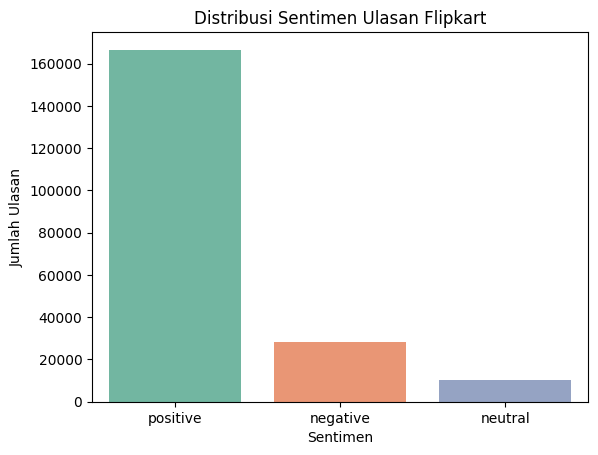

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung jumlah ulasan per label
sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)

# Visualisasi distribusi sentimen
sns.countplot(data=df, x='Sentiment', palette='Set2')
plt.title("Distribusi Sentimen Ulasan Flipkart")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah Ulasan")
plt.show()


Grafik ini dengan jelas menunjukkan bahwa ulasan di Flipkart sangat didominasi oleh sentimen positif. Jumlah ulasan positif jauh melampaui gabungan jumlah ulasan negatif dan netral. Hal ini bisa mengindikasikan bahwa secara umum, pelanggan memiliki pengalaman yang memuaskan saat berbelanja atau menggunakan layanan di Flipkart, berdasarkan data yang dianalisis ini.

##Distribusi Rating Produk dan Korelasi Rating terhadap Sentimen

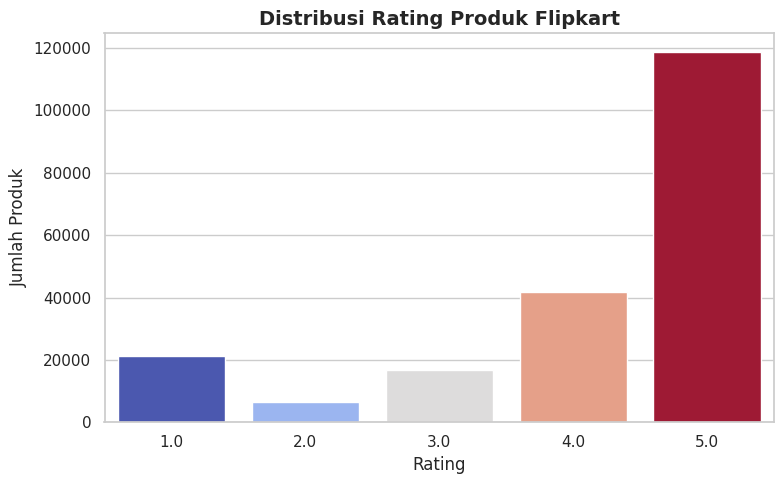

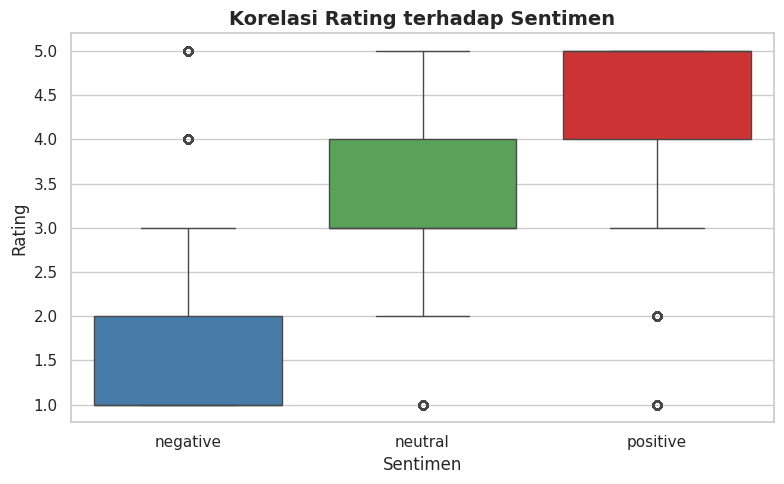

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Pastikan kolom Rate numerik
df['Rate'] = pd.to_numeric(df['Rate'], errors='coerce')

# Urutkan rating dari rendah ke tinggi
order_rate = sorted(df['Rate'].dropna().unique())

# Gunakan font default matplotlib agar tidak ada warning font
plt.rcParams['font.family'] = 'DejaVu Sans'

# Style modern
sns.set_theme(style="whitegrid")

# ====== Distribusi Rating Produk ======
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Rate', hue='Rate', order=order_rate, palette='coolwarm', legend=False)
plt.title("Distribusi Rating Produk Flipkart", fontsize=14, fontweight='bold')
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Jumlah Produk", fontsize=12)
plt.tight_layout()
plt.show()

# ====== Korelasi Rating terhadap Sentimen ======
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df,
    x='Sentiment',
    y='Rate',
    hue='Sentiment',
    palette='Set1',
    legend=False,
    order=sorted(df['Sentiment'].unique())
)
plt.title("Korelasi Rating terhadap Sentimen", fontsize=14, fontweight='bold')
plt.xlabel("Sentimen", fontsize=12)
plt.ylabel("Rating", fontsize=12)
plt.tight_layout()
plt.show()


Secara keseluruhan, data ini menunjukkan ekosistem ulasan yang sehat di Flipkart, di mana mayoritas pelanggan tidak hanya meninggalkan ulasan positif secara tekstual tetapi juga memberikan rating bintang yang tinggi untuk mengonfirmasi kepuasan mereka. Konsistensi antara sentimen kualitatif (positif, negatif) dan rating kuantitatif (1-5) menunjukkan bahwa sistem rating dan ulasan ini dapat diandalkan untuk mencerminkan pengalaman pelanggan secara akurat berdasarkan dataset yang dianalisis.

##Distribusi panjang teks review

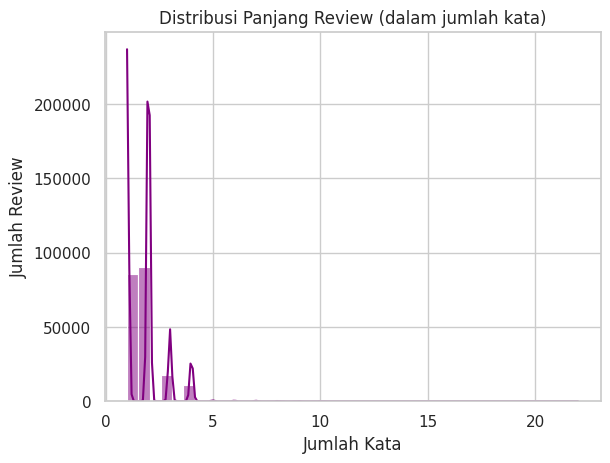

In [6]:
# Hitung panjang teks (jumlah kata)
df['review_length'] = df['Review'].apply(lambda x: len(str(x).split()))

# Distribusi panjang teks
sns.histplot(df['review_length'], bins=40, kde=True, color='purple')
plt.title("Distribusi Panjang Review (dalam jumlah kata)")
plt.xlabel("Jumlah Kata")
plt.ylabel("Jumlah Review")
plt.show()


 pengguna Flipkart cenderung memberikan ulasan yang sangat singkat dan ringkas. Sebagian besar feedback yang diberikan hanya terdiri dari beberapa kata saja.

##Analisis kata umum (WordCloud)
Visualisasi kata yang sering muncul di review positif vs negatif.

Word cloud adalah visualisasi data teks di mana ukuran setiap kata atau frasa sebanding dengan frekuensinya di dalam teks tersebut. Dengan kata lain, semakin besar sebuah kata ditampilkan, semakin sering kata itu muncul dalam ulasan pelanggan

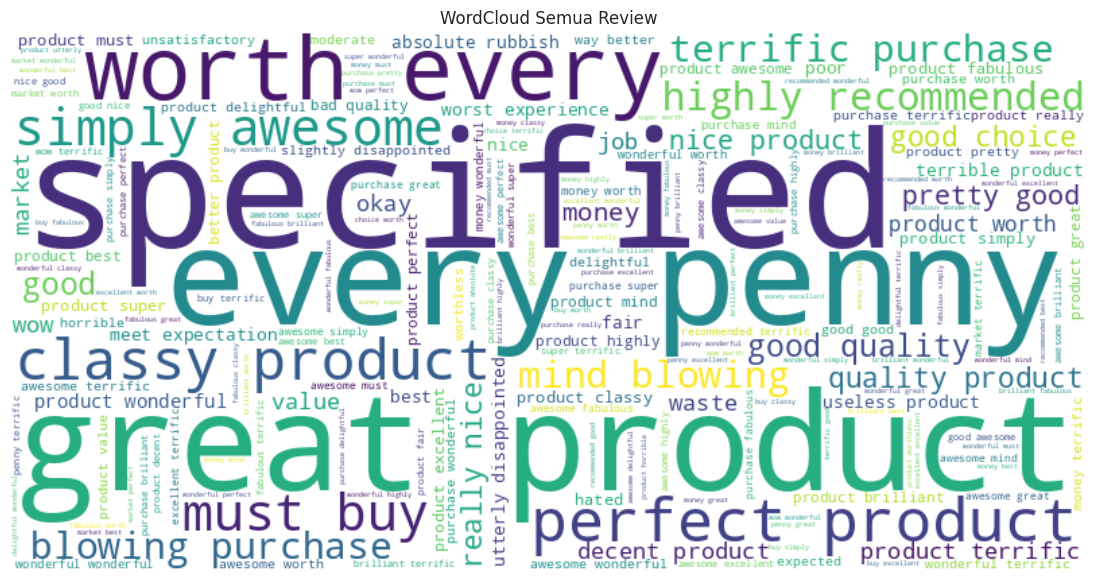

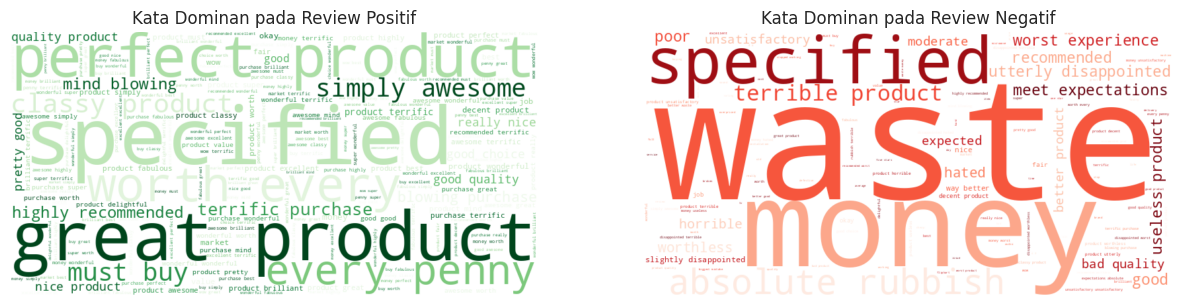

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Pastikan semua review berupa string dan hilangkan NaN
df['Review'] = df['Review'].fillna('').astype(str)

# ===== WordCloud semua review =====
all_text = " ".join(df['Review'])
wc_all = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(15,7))
plt.imshow(wc_all, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud Semua Review")
plt.show()

# ===== WordCloud per Sentiment =====
positive_text = " ".join(df[df['Sentiment']=='positive']['Review'])
negative_text = " ".join(df[df['Sentiment']=='negative']['Review'])

wc_pos = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text)
wc_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Kata Dominan pada Review Positif")

plt.subplot(1,2,2)
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Kata Dominan pada Review Negatif")
plt.show()


enunjukkan mayoritas ulasan bersifat positif. Word cloud ini menunjukkan kata-kata apa yang membuat ulasan itu positif (great, perfect, awesome).

##Hubungan harga produk dan rating
Memvisualisasikan apakah harga produk memengaruhi rating dan sentimen pelanggan.

/tmp/ipython-input-774878517.py:31: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


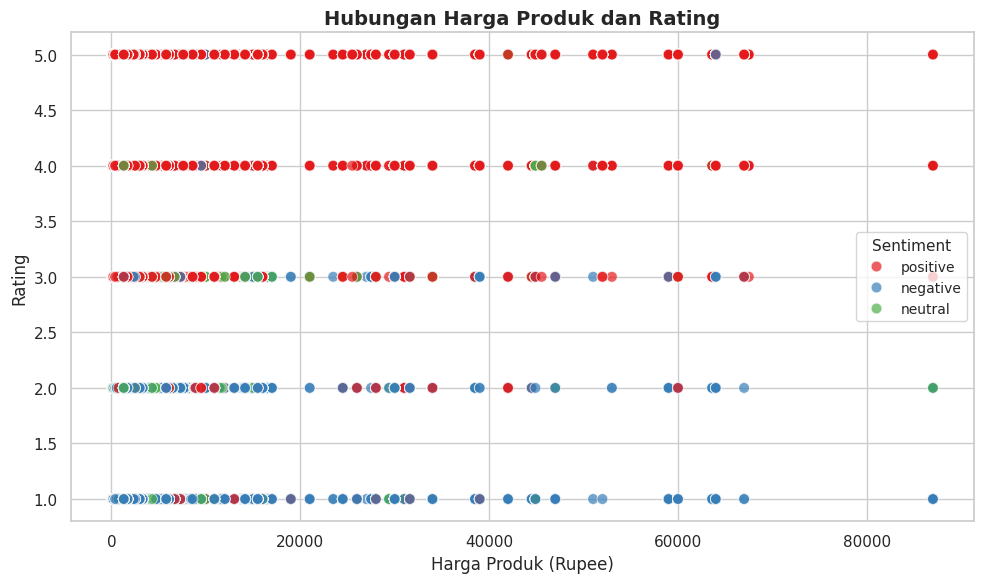

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Pastikan kolom numerik
df['product_price'] = pd.to_numeric(df['product_price'], errors='coerce')
df['Rate'] = pd.to_numeric(df['Rate'], errors='coerce')
df['Sentiment'] = df['Sentiment'].astype(str)

# Buang baris yang ada NaN di kolom penting
df_plot = df.dropna(subset=['product_price', 'Rate', 'Sentiment'])

# Style modern
sns.set_theme(style="whitegrid")

# Scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_plot,
    x='product_price',
    y='Rate',
    hue='Sentiment',
    palette='Set1',
    alpha=0.7,  # titik sedikit transparan supaya overlap terlihat
    s=60        # ukuran titik
)
plt.title("Hubungan Harga Produk dan Rating", fontsize=14, fontweight='bold')
plt.xlabel("Harga Produk (Rupee)", fontsize=12)
plt.ylabel("Rating", fontsize=12)
plt.legend(title='Sentiment', fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.show()


Grafik ini menunjukkan bahwa harga sebuah produk bukanlah faktor penentu utama terhadap rating atau sentimen yang akan diterimanya. Pelanggan memberikan rating tinggi atau rendah pada produk-produk di semua kategori harga. Kepuasan pelanggan (yang tercermin dalam rating dan sentimen) lebih mungkin dipengaruhi oleh faktor-faktor lain seperti kualitas produk, kesesuaian dengan deskripsi, pengalaman pengiriman, atau layanan pelanggan, daripada oleh harganya semata.

##Analisis kata paling sering (frequent words)
Menemukan keyword utama dari semua review, berguna untuk insight awal atau WordCloud.


In [9]:
import re
from collections import Counter

# ambil semua review
all_reviews = " ".join(df['Review'].fillna('').astype(str))

# tokenize pakai regex: ambil hanya kata
words = re.findall(r'\b[a-zA-Z]+\b', all_reviews.lower())

# hapus stopwords
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords', quiet=True)
stop_words = set(stopwords.words('english'))

words = [w for w in words if w not in stop_words]

# hitung kata paling sering
most_common_words = Counter(words).most_common(20)
print("20 kata paling sering:", most_common_words)


20 kata paling sering: [('product', 29846), ('good', 17447), ('awesome', 11297), ('purchase', 11023), ('terrific', 10954), ('nice', 9396), ('money', 9356), ('worth', 9039), ('wonderful', 9031), ('specified', 8351), ('recommended', 6696), ('great', 5706), ('best', 5658), ('brilliant', 5648), ('buy', 5642), ('perfect', 5617), ('super', 5609), ('every', 5609), ('penny', 5608), ('classy', 5605)]


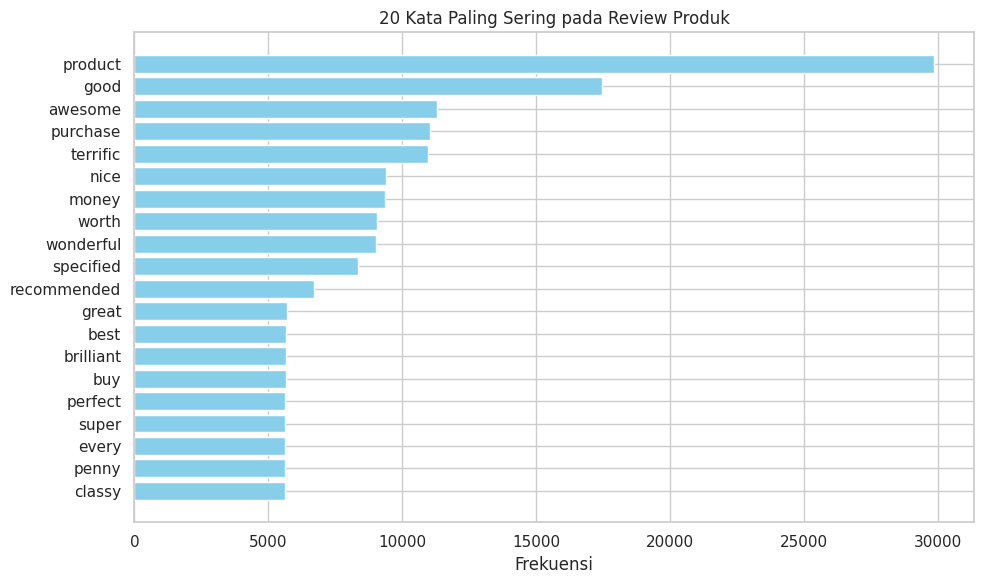

In [10]:
import matplotlib.pyplot as plt

# Pisahkan kata dan frekuensi
words_list, counts = zip(*most_common_words)

plt.figure(figsize=(10,6))
plt.barh(words_list[::-1], counts[::-1], color='skyblue')  # dibalik agar kata terbanyak di atas
plt.xlabel("Frekuensi")
plt.title("20 Kata Paling Sering pada Review Produk")
plt.tight_layout()
plt.show()


Grafik ini secara kuantitatif membuktikan apa yang telah ditunjukkan oleh word cloud sebelumnya: ulasan pelanggan di platform ini sangat positif.

Frekuensi tinggi dari kata-kata pujian secara langsung menunjukkan bahwa mayoritas pelanggan puas dengan kualitas dan nilai produk yang mereka beli. Visualisasi ini memperkuat semua analisis sebelumnya yang menyimpulkan bahwa sentimen pelanggan secara keseluruhan sangat baik.

##Bigram
Visualisasi bigram ini menampilkan pasangan kata yang paling sering muncul dalam ulasan pelanggan. Barplot memperlihatkan frekuensi masing-masing bigram, sehingga kita dapat mengidentifikasi tema atau isu yang paling sering dibahas, misalnya ‘battery dies’, ‘fast delivery’, atau ‘good quality’. WordCloud menampilkan bigram secara visual, di mana ukuran kata/frasa mencerminkan seberapa sering pasangan kata tersebut muncul. Analisis bigram membantu menangkap konteks lebih kaya dibandingkan kata tunggal (unigram), sehingga memudahkan tim produk atau layanan pelanggan untuk memahami keluhan dan pujian spesifik dari pelanggan

Top 20 Bigram:
                 Bigram  Frequency
5        great product       5647
10     perfect product       5606
19         worth penny       5606
2       classy product       5603
14      simply awesome       5599
0          best market       5555
7             just wow       5529
6   highly recommended       5527
15   terrific purchase       5510
8         mind blowing       5506
1     blowing purchase       5502
4         good quality       3614
12     quality product       3611
13         really nice       3575
3          good choice       3574
9         nice product       3538
16         value money       3498
11         pretty good       3475
18         worth money       3400
17         waste money       2453


/tmp/ipython-input-1073849432.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Bigram', data=freq_bigrams, palette='viridis')


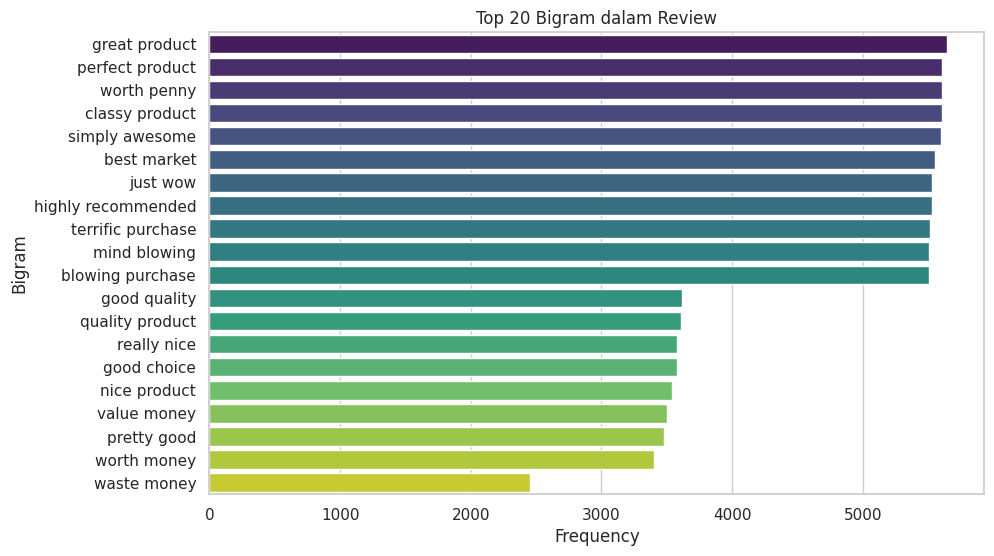

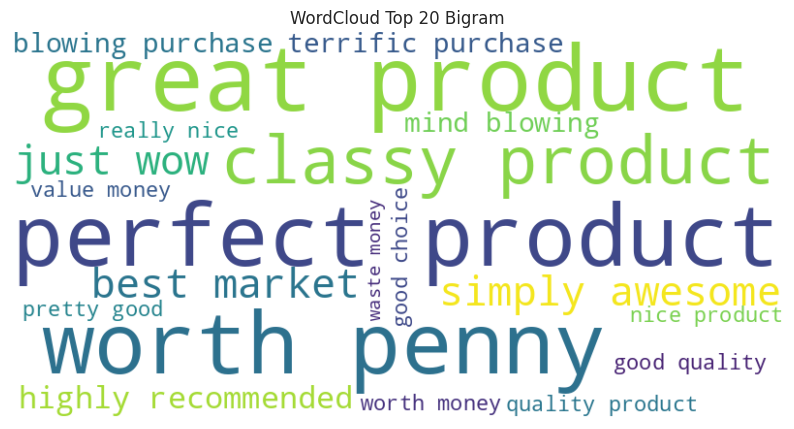

In [80]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Bigram
vectorizer_bigram = CountVectorizer(ngram_range=(2,2), stop_words='english', max_features=20)
X_bigram = vectorizer_bigram.fit_transform(df['Review'].astype(str))
freq_bigrams = pd.DataFrame({'Bigram': vectorizer_bigram.get_feature_names_out(),
                             'Frequency': X_bigram.toarray().sum(axis=0)})
freq_bigrams = freq_bigrams.sort_values(by='Frequency', ascending=False)
print("Top 20 Bigram:\n", freq_bigrams)

# Barplot Bigram
plt.figure(figsize=(10,6))
sns.barplot(x='Frequency', y='Bigram', data=freq_bigrams, palette='viridis')
plt.title("Top 20 Bigram dalam Review")
plt.show()

# WordCloud Bigram
bigram_dict = dict(zip(freq_bigrams['Bigram'], freq_bigrams['Frequency']))
wc_bigram = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(bigram_dict)
plt.figure(figsize=(10,6))
plt.imshow(wc_bigram, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud Top 20 Bigram")
plt.show()


##Trigram
Visualisasi trigram ini menampilkan tiga kata yang paling sering muncul bersamaan dalam ulasan pelanggan. Barplot menunjukkan frekuensi kemunculan setiap trigram, sehingga memudahkan untuk melihat tema atau isu yang paling banyak dibahas, seperti ‘battery dies quickly’, ‘fast delivery service’, atau ‘color not matching’. Sementara WordCloud menampilkan trigram secara visual, dengan ukuran kata/frasa yang lebih besar menunjukkan frekuensi kemunculannya. Analisis trigram ini membantu kita memahami konteks lebih kaya daripada unigram atau bigram, sehingga dapat mengidentifikasi masalah spesifik, pujian, atau pola perilaku pelanggan yang signifikan. Informasi ini sangat berguna untuk membuat rekomendasi strategi produk dan layanan yang lebih tepat sasaran

Top 20 Trigram:
                       Trigram  Frequency
12      mind blowing purchase       5502
8        good quality product       3602
3       did meet expectations       1215
4             don waste money       1184
5     expected better product        852
7          good product price          6
1           best air purifier          5
2        biggest mistake life          5
0            aura really good          4
6         good product manual          4
10           kent aura really          4
9              just okay okay          4
11  manual misleading filters          4
13      product fast delivery          4
14  product manual misleading          4
15   product reasonable price          4
16        quality value money          4
17        really good product          4
18        solo microwave oven          4
19    suitable polluted delhi          4


/tmp/ipython-input-1303547458.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Trigram', data=freq_trigrams, palette='magma')


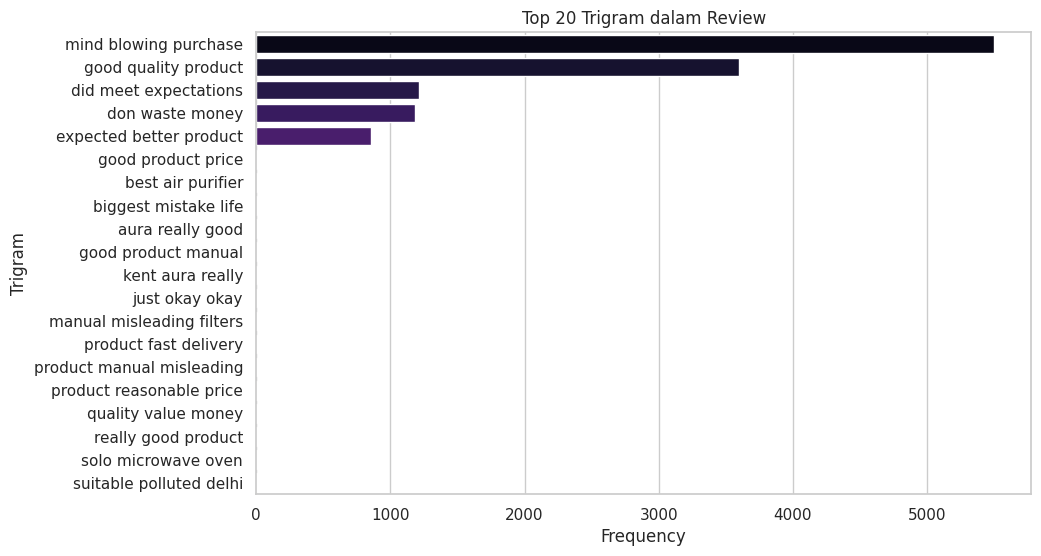

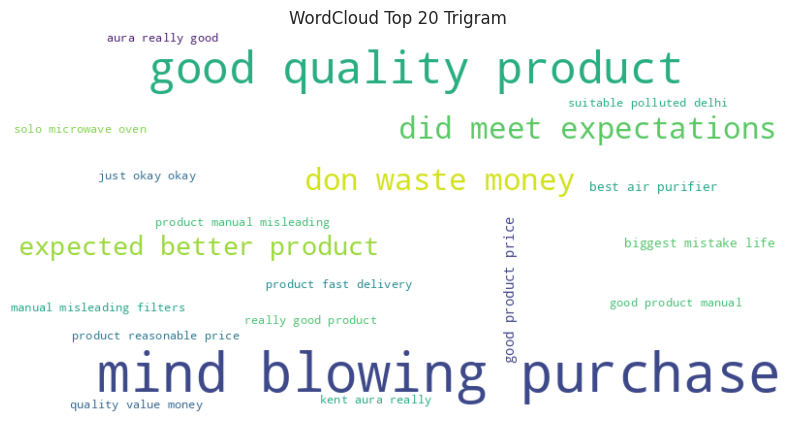

In [81]:
# Trigram
vectorizer_trigram = CountVectorizer(ngram_range=(3,3), stop_words='english', max_features=20)
X_trigram = vectorizer_trigram.fit_transform(df['Review'].astype(str))
freq_trigrams = pd.DataFrame({'Trigram': vectorizer_trigram.get_feature_names_out(),
                              'Frequency': X_trigram.toarray().sum(axis=0)})
freq_trigrams = freq_trigrams.sort_values(by='Frequency', ascending=False)
print("Top 20 Trigram:\n", freq_trigrams)

# Barplot Trigram
plt.figure(figsize=(10,6))
sns.barplot(x='Frequency', y='Trigram', data=freq_trigrams, palette='magma')
plt.title("Top 20 Trigram dalam Review")
plt.show()

# WordCloud Trigram
trigram_dict = dict(zip(freq_trigrams['Trigram'], freq_trigrams['Frequency']))
wc_trigram = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(trigram_dict)
plt.figure(figsize=(10,8))
plt.imshow(wc_trigram, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud Top 20 Trigram")
plt.show()


##Analisis Distribusi Sentimen per Produk

/tmp/ipython-input-512781999.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


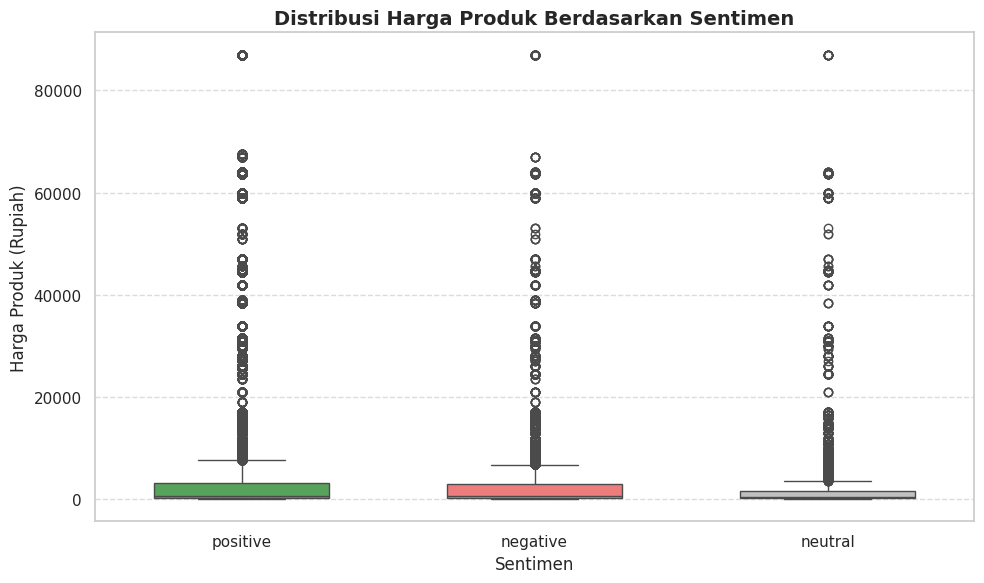

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan harga dalam bentuk numerik
df['product_price'] = pd.to_numeric(df['product_price'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x='Sentiment',
    y='product_price',
    palette={'negative': '#FF6B6B', 'neutral': '#C0C0C0', 'positive': '#4CAF50'},
    width=0.6,
)

plt.title("Distribusi Harga Produk Berdasarkan Sentimen", fontsize=14, weight='bold')
plt.xlabel("Sentimen", fontsize=12)
plt.ylabel("Harga Produk (Rupiah)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Grafik box plot ini menguatkan kesimpulan dari scatter plot ("Hubungan Harga Produk dan Rating") dengan cara yang berbeda:

Harga produk tidak memiliki korelasi yang signifikan dengan sentimen ulasan.

Artinya, produk murah tidak secara otomatis mendapat ulasan positif, dan produk mahal juga tidak dijamin bebas dari ulasan negatif. Pelanggan memberikan ulasan berdasarkan faktor-faktor lain di luar harga, seperti kualitas, fungsionalitas, dan pengalaman pembelian secara keseluruhan.

In [44]:
# Ubah ke numeric, jika gagal ubah menjadi NaN
df['Rate'] = pd.to_numeric(df['Rate'], errors='coerce')
df['product_price'] = pd.to_numeric(df['product_price'], errors='coerce')

# Jika ada NaN, bisa diisi atau dihapus
df = df.dropna(subset=['Rate', 'product_price', 'Sentiment_num', 'Review_len'])


##Analisis Outlier Sentiment vs Rating
Tujuan: Mendeteksi review yang tidak konsisten, misalnya rating 5 tapi review negatif

In [47]:
inconsistent = df[
    ((df['Rate'] <= 2) & (df['Sentiment'] == 'positive')) |
    ((df['Rate'] >= 4) & (df['Sentiment'] == 'negative'))
]
display(inconsistent[['product_name', 'Rate', 'Review', 'Sentiment']])


,product_name,Rate,Review,Sentiment
59,MAHARAJA WHITELINE 65 L Desert Air Cooler?????...,1.0,worthless,positive
73,MAHARAJA WHITELINE 65 L Desert Air Cooler?????...,1.0,useless product,positive
86,MAHARAJA WHITELINE 65 L Desert Air Cooler?????...,2.0,expected a better product,positive
123,MAHARAJA WHITELINE 65 L Desert Air Cooler?????...,5.0,perfect product!,negative
126,MAHARAJA WHITELINE 65 L Desert Air Cooler?????...,2.0,bad quality,positive
...,...,...,...,...
204891,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,4.0,worth the money,negative
204903,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,5.0,perfect product!,negative
204933,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,5.0,must buy!,negative
204977,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,4.0,good quality product,negative


##Analisis WordCloud per Produk Unggulan & Bermasalah
Tujuan: Bandingkan kata yang sering muncul di produk paling disukai vs paling dibenci.
➡️ Sangat berguna untuk LLM Granite saat diarahkan mencari insight produk spesifik.
Kode:

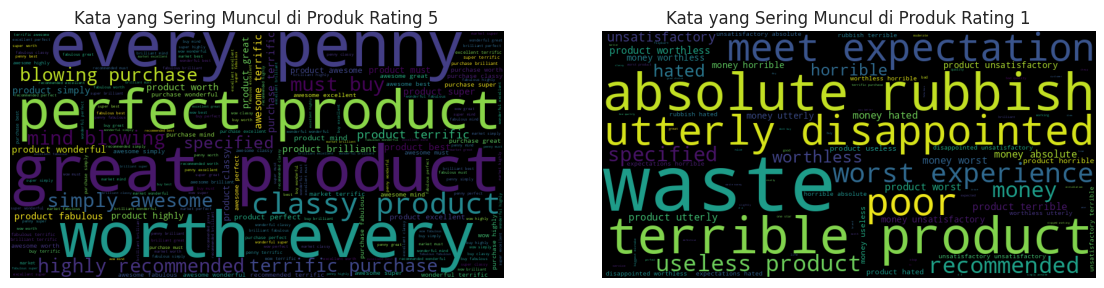

In [52]:
from wordcloud import WordCloud

produk_terbaik = df[df['Rate'] == 5]['Review'].str.cat(sep=' ')
produk_terburuk = df[df['Rate'] == 1]['Review'].str.cat(sep=' ')

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.imshow(WordCloud(width=800, height=400).generate(produk_terbaik))
plt.axis("off")
plt.title("Kata yang Sering Muncul di Produk Rating 5")

plt.subplot(1,2,2)
plt.imshow(WordCloud(width=800, height=400).generate(produk_terburuk))
plt.axis("off")
plt.title("Kata yang Sering Muncul di Produk Rating 1")
plt.show()


# Data Preprocessing

##Import Library & Load Dataset

In [13]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import string

# Download stopwords & wordnet
nltk.download('stopwords')
nltk.download('wordnet')

# Load dataset
data_path = '/content/drive/MyDrive/Kuliah/LOMBA/skilvulxibm/Dataset-SA.csv'
df = pd.read_csv(data_path)

# Tampilkan info dasar
pd.set_option("display.max_columns", None)
df.info()
df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205052 non-null  object
 1   product_price  205052 non-null  object
 2   Rate           205052 non-null  object
 3   Review         180388 non-null  object
 4   Summary        205041 non-null  object
 5   Sentiment      205052 non-null  object
dtypes: object(6)
memory usage: 9.4+ MB


,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


##Cek Missing value

In [14]:
missing_values = df.isnull().sum()
print(missing_values)

product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64


ditemukan missing value di Review berjumlah 24664 dan summary berjumlah 11

##Menghapus Missing Value

In [15]:
# Hapus baris yang Review-nya kosong
df = df.dropna(subset=['Review'])

# Summary: isi dengan string kosong jika ada missing
df['Summary'] = df['Summary'].fillna('')

# Reset index setelah hapus
df.reset_index(drop=True, inplace=True)

# Cek info dataset setelah cleaning
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180388 entries, 0 to 180387
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   180388 non-null  object
 1   product_price  180388 non-null  object
 2   Rate           180388 non-null  object
 3   Review         180388 non-null  object
 4   Summary        180388 non-null  object
 5   Sentiment      180388 non-null  object
dtypes: object(6)
memory usage: 8.3+ MB


##Cek kembali Missing Value

In [16]:
missing_values = df.isnull().sum()
print(missing_values)

product_name     0
product_price    0
Rate             0
Review           0
Summary          0
Sentiment        0
dtype: int64


## 3. Cek Duplicated Data

In [17]:
# Cek jumlah duplikat sebelum dihapus
df_str = df.astype(str)  # ubah semua kolom ke string
duplicates = df_str.duplicated().sum()
print("Jumlah duplikat sebelum dihapus:", duplicates)

Jumlah duplikat sebelum dihapus: 25913


##Menghapus duplicate data dan mengeceknya kembali

In [18]:
# Hapus duplikat
df = df.drop_duplicates().reset_index(drop=True)

# Cek jumlah duplikat setelah dihapus
duplicates_after = df.astype(str).duplicated().sum()
print("Jumlah duplikat setelah dihapus:", duplicates_after)

Jumlah duplikat setelah dihapus: 0


##Normalisasi Teks
Membersihkan teks agar rapi & konsisten untuk analisis NLP seperti WordCloud, tokenisasi, bigram/trigram, atau input ke LLM.

In [19]:

# Fungsi cleaning teks
def clean_text(text):
    text = str(text).lower()                       # lowercase
    text = re.sub(r'\n', ' ', text)               # hapus newline
    text = re.sub(r'\d+', '', text)               # hapus angka
    text = text.translate(str.maketrans('', '', string.punctuation))  # hapus tanda baca
    text = re.sub(r'\s+', ' ', text).strip()     # hapus spasi berlebih
    return text

In [20]:
# Terapkan cleaning pada kolom Review dan Summary
df['Review_clean'] = df['Review'].apply(clean_text)
df['Summary_clean'] = df['Summary'].apply(clean_text)

In [21]:
# Tambahkan Kolom Fitur Numerik
# ========================
# Panjang review (jumlah kata)
df['Review_len'] = df['Review_clean'].apply(lambda x: len(x.split()))
# Panjang summary
df['Summary_len'] = df['Summary_clean'].apply(lambda x: len(x.split()))

In [22]:
# 7. Cek Hasil
# ========================
print(df[['Review', 'Review_clean', 'Review_len', 'Summary', 'Summary_clean', 'Summary_len']].head())
print(df.info())

            Review     Review_clean  Review_len  \
0           super!            super           1   
1          awesome          awesome           1   
2             fair             fair           1   
3  useless product  useless product           2   
4             fair             fair           1   

                                             Summary  \
0  great cooler excellent air flow and for this p...   
1              best budget 2 fit cooler nice cooling   
2  the quality is good but the power of air is de...   
3                  very bad product its a only a fan   
4                                      ok ok product   

                                       Summary_clean  Summary_len  
0  great cooler excellent air flow and for this p...           16  
1                best budget fit cooler nice cooling            6  
2  the quality is good but the power of air is de...           11  
3                  very bad product its a only a fan            8  
4               

Setelah preprocessing, kita menampilkan beberapa baris pertama dari kolom Review, Review_clean, Review_len, Summary, Summary_clean, dan Summary_len untuk memeriksa hasil pembersihan teks. Kolom Review_clean dan Summary_clean sudah melalui proses lowercase, penghapusan simbol, dan stopwords, sedangkan Review_len dan Summary_len menunjukkan panjang teks dalam jumlah kata. Informasi dataset (df.info()) memastikan tidak ada missing value dan semua kolom memiliki tipe data yang sesuai, sehingga data siap digunakan untuk tokenisasi dan model NLP. Langkah ini juga memperlihatkan proses preprocessing yang sistematis, penting untuk analisis selanjutnya.

#Pemodelan AI: Justifikasi dan Strategi Penggunaan IBM Granite LLM

Hasil dari Analisis Data Eksploratif (EDA), khususnya pada bagian ‘Analisis Outlier Sentiment vs Rating’, mengungkap sebuah masalah fundamental: label sentimen pada dataset asli terbukti tidak akurat dan tidak dapat diandalkan. Kualitas data yang buruk ini menjadi penghalang utama untuk menghasilkan insight bisnis yang valid.

Menghadapi data yang tidak konsisten ini, kami membutuhkan solusi yang dapat memahami konteks teks ulasan secara mendalam untuk mengoreksi ribuan kesalahan label secara efisien. Oleh karena itu, kami beralih ke solusi AI.

Kami secara spesifik memilih dan melakukan fine-tuning pada IBM Granite LLM dengan tujuan utama bukan sekadar klasifikasi biasa, melainkan untuk membangun 'sumber kebenaran' (source of truth) yang baru. Prosesnya adalah dengan melatih model menggunakan data rating sebagai proksi sentimen yang benar, sehingga model dapat mempelajari pola bahasa dari ulasan positif dan negatif yang sesungguhnya. Langkah ini sangat krusial untuk memastikan semua analisis strategis selanjutnya didasarkan pada data yang bersih dan akurat.

# Training (Fine Tuning LLM IBM Granite)
Menyiapkan environment untuk integrasi dan fine-tuning LLM seperti IBM Granite

In [23]:
#  Instalasi library
!pip install replicate
!pip install langchain
!pip install langchain_community
!pip install langchain_experimental

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 73.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.2/467.2 kB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.79
    Uninstalling langchain-core-0.3.79:
      Successfully uninstalled langchain-core-0.3.79
  Attempting uninstall: langchain-text-splitters
    Found existing installation: langchain-text-splitters 0.3.11
    Uninstalling langchain-text-splitters-0.3.11:
      Successfull

In [24]:
# Import library
import os
import pandas as pd
import replicate
from langchain_community.llms import Replicate
from langchain_experimental.agents import create_pandas_dataframe_agent

In [25]:
# Load dataset
data_path = '/content/drive/MyDrive/Kuliah/LOMBA/skilvulxibm/Dataset-SA.csv'
df = pd.read_csv(data_path)
pd.set_option("display.max_columns", None)
print(df.head())


                                        product_name product_price Rate  \
0  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
1  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
2  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   
3  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    1   
4  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   

            Review                                            Summary  \
0           super!  great cooler excellent air flow and for this p...   
1          awesome              best budget 2 fit cooler nice cooling   
2             fair  the quality is good but the power of air is de...   
3  useless product                  very bad product its a only a fan   
4             fair                                      ok ok product   

  Sentiment  
0  positive  
1  positive  
2  positive  
3  negative  
4   neutral  


In [26]:
from google.colab import userdata

# Ambil token langsung dari Colab secret
api_token = userdata.get('api_token')  # nama secret yang kamu buat

# Set ke environment variable
os.environ['REPLICATE_API_TOKEN'] = api_token

# Cek client replicate
import replicate
client = replicate.Client(api_token=os.environ['REPLICATE_API_TOKEN'])
print("Daftar model Replicate:")
print(client.models.list())


Daftar model Replicate:
previous=None next='https://api.replicate.com/v1/models?cursor=cD0yMDI1LTEwLTE0KzAwJTNBNDMlM0EwOC4yNDk5NzAlMkIwMCUzQTAw' results=[Model(url='https://replicate.com/rafaelgalle/whisper-diarization-advanced', owner='rafaelgalle', name='whisper-diarization-advanced', description='Ultra-fast, customizable speech-to-text and speaker diarization for noisy, multi-speaker audio. Includes advanced noise reduction, stereo channel support, and flexible audio preprocessing—ideal for call centers, meetings, and podcasts.', visibility='public', github_url='https://github.com/rafaelgalle/whisper-diarization-advanced', paper_url='https://arxiv.org/abs/2212.04356', license_url='https://opensource.org/license/mit', run_count=107479, cover_image_url='https://tjzk.replicate.delivery/models_models_cover_image/26f360b6-922e-4028-84e6-ef7d020eb0fd/IQby_3.gif', default_example=Prediction(id='0mmyk5aj7srm80cs4p3atng470', model='rafaelgalle/whisper-diarization-advanced', version='a910390c

In [27]:
# Inisialisasi LLM
llm = Replicate(
    model="ibm-granite/granite-3.3-8b-instruct",
    model_kwargs={
        "temperature": 0.2,
        "max_new_tokens": 300,
        "min_new_tokens": 50,
        "top_p": 0.9,
        "top_k": 50
    }
)

In [28]:
from langchain_experimental.agents import create_pandas_dataframe_agent
agent = create_pandas_dataframe_agent(
    llm=llm,
    df=df,
    verbose=True,   # untuk lihat log langkah-langkah reasoning
    allow_dangerous_code=True  # biar bisa eksekusi code pandas
)


Membuat dokumen per review yang lengkap agar LLM dapat menganalisis dan mengekstrak insight secara efektif.

In [29]:
def make_review_doc(row):
    return f"""
Produk: {row['product_name']}
Harga: {row['product_price']}
Rating: {row['Rate']}
Ulasan: {row['Review']}
Ringkasan: {row['Summary']}
Sentimen: {row['Sentiment']}
"""

df['doc_text'] = df.apply(make_review_doc, axis=1)


#Testing

Memastikan LLM tidak menerima dokumen terlalu panjang dan jawaban tetap relevan, singkat, dan aman.

In [30]:
MAX_CHARS_PER_DOC = 1000
MAX_DOCS = 5

def ask_granite_safe(query, docs, llm):
    """
    Query IBM Granite dengan context yang aman.
    Batasi jumlah dokumen dan panjang tiap dokumen.
    """
    if not docs:
        context = "Tidak ada konteks yang relevan ditemukan."
    else:
        docs_limited = [d[:MAX_CHARS_PER_DOC] for d in docs[:MAX_DOCS]]
        context = "\n\n".join(docs_limited)

    prompt = f"""
Gunakan konteks berikut untuk menjawab pertanyaan secara singkat dan jelas:

{context}

Pertanyaan: {query}
Jawaban:
"""
    return llm.invoke(prompt)


In [31]:
# Pertanyaan contoh
query = "Apa tema paling sering muncul dalam ulasan negatif produk Flipkart?"

# Ambil dokumen review negatif
relevant_docs = df[df['Sentiment']=='negative']['doc_text'].tolist()

# Panggil Granite dengan context terbatas
answer = ask_granite_safe(query, relevant_docs, llm)

print("=== Pertanyaan ===")
print(query)
print("\n=== Jawaban Granite ===")
print(answer)


=== Pertanyaan ===
Apa tema paling sering muncul dalam ulasan negatif produk Flipkart?

=== Jawaban Granite ===
The most frequent theme in negative product reviews on Flipkart for these air coolers is poor performance and quality issues. Specific complaints include the product functioning merely as a fan (Candes 12L), dissatisfaction with cooling efficiency (Candes 60L), low motor and water capacity (MAHARAJA WHITELINE 65L), and issues with the switch and fan speed (MAHARAJA WHITELINE 65L). These reviews express disappointment, describing the products as "useless," "bad quality," and a "waste of money."


In [54]:
!pip install rouge

#Insight & Findings

##Tema & Masalah Tersembunyi

In [68]:
query1 ="""
Analisis semua review negatif Flipkart.
Identifikasi tema atau masalah yang paling sering muncul, termasuk pola tersembunyi
yang memengaruhi kepuasan pelanggan.
Sertakan insight yang relevan untuk keputusan bisnis.
"""
relevant_docs1 = df[df['Sentiment']=='negative']['doc_text'].tolist()
answer1 = ask_granite_safe(query1, relevant_docs1, llm)

print("=== Pertanyaan ===")
print(query1)
print("\n=== Jawaban Granite ===")
print(answer1)
print("\n" + "="*50 + "\n")

=== Pertanyaan ===

Analisis semua review negatif Flipkart. 
Identifikasi tema atau masalah yang paling sering muncul, termasuk pola tersembunyi 
yang memengaruhi kepuasan pelanggan. 
Sertakan insight yang relevan untuk keputusan bisnis.


=== Jawaban Granite ===
Based on the negative reviews, the most recurring issues with the air coolers on Flipkart are:

1. **Performance Issues**: Many customers describe the coolers as "useless" or "unsatisfactory," indicating poor cooling performance. This suggests a problem with the cooling mechanism or fan efficiency.

2. **Quality Concerns**: Reviews mention "bad quality" and "waste of money," pointing to issues with build quality, durability, or overall product reliability.

3. **Design Flaws**: Some reviews highlight specific design problems, such as difficulties in changing water due to poorly placed vent holes, and a low fan speed. These issues suggest a lack of user-centric design.

4. **Delivery Delays**: One review mentions a 10-day delay

##Faktor Penentu Rating

In [71]:
query2 = """
Dari seluruh review Flipkart, temukan faktor-faktor kunci yang memengaruhi rating pelanggan.
Pertimbangkan kata kunci, panjang review, harga, dan sentimen.
Berikan analisis mendalam yang bisa digunakan untuk strategi produk.
"""
relevant_docs2 = df['doc_text'].tolist()
answer2 = ask_granite_safe(query2, relevant_docs2, llm)

print("=== Pertanyaan ===")
print(query2)
print("\n=== Jawaban Granite ===")
print(answer2)
print("\n" + "="*50 + "\n")


=== Pertanyaan ===

Dari seluruh review Flipkart, temukan faktor-faktor kunci yang memengaruhi rating pelanggan. 
Pertimbangkan kata kunci, panjang review, harga, dan sentimen. 
Berikan analisis mendalam yang bisa digunakan untuk strategi produk.


=== Jawaban Granite ===
Based on the Flipkart reviews, the key factors influencing customer ratings for the Candes 12L Room/Personal Air Cooler are:

1. Cooling Performance: Customers highly appreciate the excellent airflow and cooling effect, often comparing it favorably to other coolers in its price range. This positive sentiment is consistently mentioned in high-rated reviews.

2. Value for Money: The product's affordability, priced at 3999, is frequently highlighted as a significant advantage. Customers consider it an "amazing" and "best budget" cooler, indicating that its price positively impacts their overall satisfaction.

3. Design and Features: The elegant design, honeycomb cooling pad, and ice chamber are appreciated by many users,

##Pola Outlier & Inkonistensi

In [72]:
query3 = """
Identifikasi review yang tidak konsisten (misal rating tinggi tapi komentar negatif)
dan jelaskan apa implikasinya terhadap penilaian produk dan loyalitas pelanggan.
Berikan insight strategis berdasarkan pola ini.
"""
relevant_docs3 = df[df.apply(lambda x: (x['Rate'] >= 4 and x['Sentiment'] == 'negative') or
                                         (x['Rate'] <= 2 and x['Sentiment'] == 'positive'), axis=1)]['doc_text'].tolist()
answer3 = ask_granite_safe(query3, relevant_docs3, llm)

print("=== Pertanyaan ===")
print(query3)
print("\n=== Jawaban Granite ===")
print(answer3)
print("\n" + "="*50 + "\n")


=== Pertanyaan ===

Identifikasi review yang tidak konsisten (misal rating tinggi tapi komentar negatif) 
dan jelaskan apa implikasinya terhadap penilaian produk dan loyalitas pelanggan.
Berikan insight strategis berdasarkan pola ini.


=== Jawaban Granite ===
The reviews provided show inconsistencies in rating and sentiment, which can mislead potential buyers and impact the product's perceived quality and brand loyalty. Here are the problematic reviews:

1. Rating: 1 (lowest), Sentiment: Positive - This review claims the product is "worthless" and a "worst product," yet it's tagged as positive. This inconsistency suggests a misinterpretation or error in labeling the sentiment.

2. Rating: 2, Sentiment: Positive - Although the reviewer mentions issues like cheap aluminum motors and high repair costs, they still conclude with a positive sentiment, which seems contradictory.

3. Rating: 5, Sentiment: Negative - This review states "not working motors and very bad poor maharaja cooler," cl

## 4. Harga vs Sentimen & Rating

In [78]:

# ============================

query4 = """
Analisis hubungan antara harga produk dan sentimen/review pelanggan di Flipkart.
Apakah produk dengan harga tinggi cenderung mendapat review negatif atau positif tertentu?
Sertakan pola, insight, dan implikasi untuk strategi penetapan harga atau promosi produk.
"""

# Ambil semua review sebagai konteks
relevant_docs4 = df['doc_text'].tolist()

# Panggil Granite
answer4 = ask_granite_safe(query4, relevant_docs4, llm)

# Tampilkan hasil
print("=== Pertanyaan ===")
print(query4)
print("\n=== Jawaban Granite ===")
print(answer4)
print("\n" + "="*50 + "\n")


=== Pertanyaan ===

Analisis hubungan antara harga produk dan sentimen/review pelanggan di Flipkart. 
Apakah produk dengan harga tinggi cenderung mendapat review negatif atau positif tertentu? 
Sertakan pola, insight, dan implikasi untuk strategi penetapan harga atau promosi produk.


=== Jawaban Granite ===
Based on the provided reviews, there's no clear pattern suggesting that higher-priced products invariably receive negative reviews. Here's a breakdown:

1. Two positive reviews (rating 5) praise the product's performance, cooling efficiency, and value for money, despite its price of 3999.
2. One fair review (rating 3) acknowledges good quality but mentions only decent air power, indicating a balanced perspective rather than a negative one.
3. One negative review (rating 1) criticizes the product as "useless," claiming it functions merely as a fan. This review doesn't directly correlate with price but rather with perceived performance.
4. One neutral review (rating 3) simply describ

## 5. Benchmarking / Perbandingan Produk

In [79]:

# ============================

query5 = """
Bandingkan review dan rating antar produk sejenis di Flipkart.
Identifikasi keunggulan dan kelemahan masing-masing produk menurut pelanggan.
Sertakan insight yang relevan untuk pengambilan keputusan produk atau strategi pemasaran.
"""

# Ambil semua review sebagai konteks
relevant_docs5 = df['doc_text'].tolist()

# Panggil Granite
answer5 = ask_granite_safe(query5, relevant_docs5, llm)

# Tampilkan hasil
print("=== Pertanyaan ===")
print(query5)
print("\n=== Jawaban Granite ===")
print(answer5)
print("\n" + "="*50 + "\n")


=== Pertanyaan ===

Bandingkan review dan rating antar produk sejenis di Flipkart. 
Identifikasi keunggulan dan kelemahan masing-masing produk menurut pelanggan. 
Sertakan insight yang relevan untuk pengambilan keputusan produk atau strategi pemasaran.


=== Jawaban Granite ===
Based on the provided reviews, here's a comparison of the Candes 12L Room/Personal Air Cooler on Flipkart:

1. **Positive Reviews (Rating: 5)**
   - Both reviews highlight the product's excellent airflow and cooling performance, describing it as "great," "excellent," "best budget fit," and "amazing."
   - Customers appreciate its design, mentioning features like the "elegant" look, "honeycomb cooling pad," and "ice chamber."
   - The price is consistently seen as very good value for money, described as "unbelievable" and "best budget fit."

2. **Neutral Review (Rating: 3)**
   - This review acknowledges the product's good quality but finds the cooling power to be only "decent."
   - The sentiment is neutral, ind

#Rekomendasi Strategis

##Prioritas Perbaikan Produk

In [77]:
query4 = """
Berdasarkan review negatif, identifikasi produk yang paling bermasalah dan jelaskan
tindakan spesifik yang harus dilakukan oleh tim produk, layanan, atau marketing.
Berikan rekomendasi prioritas yang actionable.
"""
relevant_docs4 = df[df['Sentiment']=='negative']['doc_text'].tolist()
answer4 = ask_granite_safe(query4, relevant_docs4, llm)

print("=== Pertanyaan ===")
print(query4)
print("\n=== Jawaban Granite ===")
print(answer4)
print("\n" + "="*50 + "\n")


=== Pertanyaan ===

Berdasarkan review negatif, identifikasi produk yang paling bermasalah dan jelaskan 
tindakan spesifik yang harus dilakukan oleh tim produk, layanan, atau marketing.
Berikan rekomendasi prioritas yang actionable.


=== Jawaban Granite ===
Based on the negative reviews, the Candes 60 L Room/Personal Air Cooler appears to have the most recurring issues. The problems mentioned include poor cooling performance, being essentially just a fan, low motor capacity, insufficient airflow, and a poorly designed water tank. 

Here are actionable steps for the product, service, and marketing teams:

1. **Product Team**: Investigate the reported issues with cooling efficiency, airflow, and motor capacity. Conduct thorough testing to identify design flaws or manufacturing defects. If necessary, revise the product design to enhance cooling performance, improve motor efficiency, and optimize airflow.

2. **Service Team**: Establish a robust customer support system to address concerns

##Optimasi Pengalaman Pelanggan

In [75]:
query5 = """
Analisis seluruh review positif dan negatif untuk menyarankan strategi peningkatan
pengalaman pelanggan Flipkart. Sertakan langkah-langkah konkret untuk meningkatkan
kepuasan dan loyalitas pelanggan.
"""
relevant_docs5 = df['doc_text'].tolist()
answer5 = ask_granite_safe(query5, relevant_docs5, llm)

print("=== Pertanyaan ===")
print(query5)
print("\n=== Jawaban Granite ===")
print(answer5)
print("\n" + "="*50 + "\n")


=== Pertanyaan ===

Analisis seluruh review positif dan negatif untuk menyarankan strategi peningkatan 
pengalaman pelanggan Flipkart. Sertakan langkah-langkah konkret untuk meningkatkan 
kepuasan dan loyalitas pelanggan.


=== Jawaban Granite ===
### Analisis Review dan Strategi Peningkatan Pengalaman Pelanggan Flipkart

#### Analisis Review Positif:

1. **Kualitas Produk yang Baik**: Beberapa pelanggan mengatakan bahwa kualitas produk Candes 12 L Room/Personal Air Cooler sangat baik. Hal ini menunjukkan bahwa produk memenuhi standar kualitas yang diharapkan.

2. **Fungsi Cooling Efektif**: Pelanggan mengatakan bahwa produk memiliki cooling yang efektif, terutama dengan fitur Honey Comb Cooling Pad dan Ice Chamber.

3. **Harga Terjangkau**: Pelanggan menganggap harga Rp. 3.999.000 sebagai terjangkau untuk kualitas yang diperoleh.

4. **Rasa puas dan kepuasan**: Pelanggan menyampaikan rasa puas dan kepuasan dengan produk, mengatakan bahwa produk "sangat bagus" dan "terbaik untuk anggar

##Strategi Produk & Marketing

In [76]:
query6 = """
Berdasarkan insight dari review positif, rekomendasikan strategi marketing atau
promosi yang dapat meningkatkan penjualan produk unggulan.
Fokus pada apa yang pelanggan sukai dan bagaimana memanfaatkannya.
"""
relevant_docs6 = df[df['Sentiment']=='positive']['doc_text'].tolist()
answer6 = ask_granite_safe(query6, relevant_docs6, llm)

print("=== Pertanyaan ===")
print(query6)
print("\n=== Jawaban Granite ===")
print(answer6)
print("\n" + "="*50 + "\n")


=== Pertanyaan ===

Berdasarkan insight dari review positif, rekomendasikan strategi marketing atau 
promosi yang dapat meningkatkan penjualan produk unggulan. 
Fokus pada apa yang pelanggan sukai dan bagaimana memanfaatkannya.


=== Jawaban Granite ===
Berdasarkan review positif, beberapa strategi marketing dan promosi yang dapat meningkatkan penjualan produk unggulan Candes 12 L Room/Personal Air Cooler adalah:

1. **Fokus pada Kualitas Cooling dan Efektivitas**: Pelanggan suka kualitas cooling yang baik dan aliran udara yang cukup. Strategi promosi bisa menekankan kemampuan produk ini untuk menyediakan ruang yang lebih sejuk dengan efisien.

2. **Menonjolkan Fitur Unik**: Fitur seperti pad honey comb elegan, kamer es, dan blower dianggap menarik. Strategi promosi bisa menampilkan dan menjelaskan manfaat dari fitur-fitur ini secara detail, seperti bagaimana pad honey comb meningkatkan kualitas cooling dan kamer es membantu menambahkan efektivitas.

3. **Harga Terbaik**: Pelanggan men